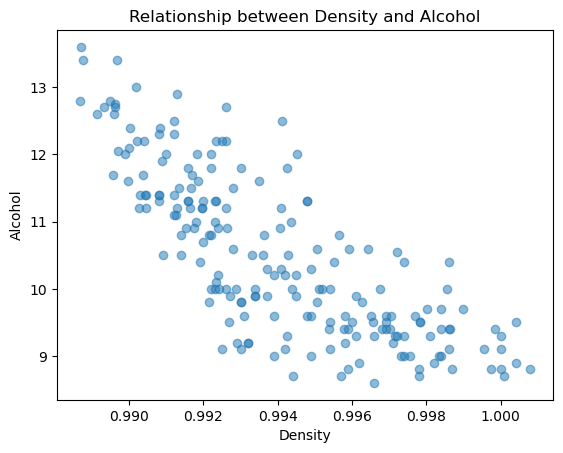

Linear Model: Alcohol = -323.5164 * Density + 332.0671


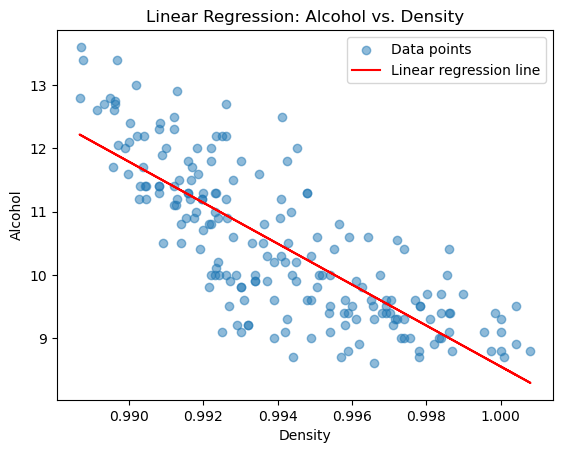

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Replace with your actual file path
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Clean the data by dropping rows with missing values
data_cleaned = data.dropna()

# Step 3: Take a random sample of 200 instances from the cleaned dataset
sample_data = data_cleaned.sample(n=200, random_state=42)

# Step 4: Write the random sample into a CSV file
sample_data.to_csv('s4062761-A2SampleOne.csv', index=False)

# Step 5: Select two variables: alcohol and density
selected_data = sample_data[['alcohol', 'density']]


# Ensure that both columns have numeric values using .loc[]
selected_data.loc[:, 'alcohol'] = pd.to_numeric(selected_data['alcohol'], errors='coerce')
selected_data.loc[:, 'density'] = pd.to_numeric(selected_data['density'], errors='coerce')


# Drop rows with non-numeric values
selected_data_clean = selected_data.dropna()

# Step 6: Display the relationship between alcohol and density using a scatter plot
plt.scatter(selected_data_clean['density'], selected_data_clean['alcohol'], alpha=0.5)
plt.title('Relationship between Density and Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

# Step 7: Build a Simple Linear Regression model
X = selected_data_clean['density'].values.reshape(-1, 1)
y = selected_data_clean['alcohol'].values

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Step 8: Predict alcohol values using the model
y_pred = linear_model.predict(X)

# Step 9: Evaluate the model (output the slope and intercept)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(f"Linear Model: Alcohol = {slope:.4f} * Density + {intercept:.4f}")

# Step 10: Plot the data points along with the linear regression line
plt.scatter(X, y, alpha=0.5, label="Data points")
plt.plot(X, y_pred, color='red', label="Linear regression line")
plt.title('Linear Regression: Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.show()


TASK 2:CLASSIFICATION

In [569]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv' # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Drop rows with missing values
cleaned_data = data.dropna()

# Step 3: Take a random sample of 500 instances
sample_data = cleaned_data.sample(n=500, random_state=42)

# Step 4: Write the random sample into a CSV file
sample_data.to_csv('4062761-A2SampleTwo.csv', index=False)

# Step 4: Select features (X) and the target variable (y)
X = sample_data.drop(columns=['quality'])  # All columns except 'quality'
y = sample_data['quality']  # The 'quality' column is the target

# Step 5: Convert data to numeric if necessary
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# Step 6: Align target variable
y = y[X.index]

# Step 7: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data (important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Implement kNN with the best k value (k=13)
best_k = 13
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Step 10: Predict the target values for the test set
y_pred_knn = knn.predict(X_test_scaled)

# Step 11: Evaluate the kNN classifier using accuracy, confusion matrix, and classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn,zero_division=0)

# Output the evaluation results
print(f"kNN Accuracy (k={best_k}): {accuracy_knn:.4f}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

kNN Accuracy (k=13): 0.5500
Confusion Matrix:
 [[ 0  0  1  2  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0 20  1  0  0]
 [ 0  0 20 25  8  0]
 [ 0  0  1  6 10  0]
 [ 0  0  0  3  1  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.45      0.95      0.62        21
           6       0.68      0.47      0.56        53
           7       0.53      0.59      0.56        17
           8       0.00      0.00      0.00         4

    accuracy                           0.55       100
   macro avg       0.28      0.34      0.29       100
weighted avg       0.54      0.55      0.52       100



In [570]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for kNN
param_grid = {
    'n_neighbors': range(1, 21),  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize the GridSearchCV for kNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=10)

# Fit the model using grid search on the training data
grid_knn.fit(X_train, y_train)

# Get the best parameters and score from the grid search
print(f"Best Parameters: {grid_knn.best_params_}")
print(f"Best Score: {grid_knn.best_score_:.4f}")


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best Score: 0.4738


In [571]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Data Cleaning - Drop rows with missing values
cleaned_data = data.dropna()

# Step 3: Random Sampling of 500 instances (sample both features and target together)
sample_data = cleaned_data.sample(n=500, random_state=42)

# Step 4: Convert 'quality' column into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Step 5: Label Encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Step 6: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Make sure to also drop corresponding rows from 'y' to maintain consistency
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Apply standard scaling to get optimized results
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Initialize and train the kNN classifier (default n_neighbors=5)
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=10,weights='distance')
knn.fit(X_train_scaled, y_train)

# Step 10: Predict the test set results
y_pred = knn.predict(X_test_scaled)

# Step 11: Evaluate the kNN model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output evaluation results
print(f"kNN Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


kNN Accuracy: 0.8000
Confusion Matrix:
 [[73  6]
 [14  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88        79
           1       0.54      0.33      0.41        21

    accuracy                           0.80       100
   macro avg       0.69      0.63      0.65       100
weighted avg       0.78      0.80      0.78       100



In [572]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Try different values of n_neighbors
    'weights': ['uniform', 'distance'],  # Try both uniform and distance-based weighting
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and evaluate performance
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict using the best kNN model
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Evaluate the best model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
class_report_best_knn = classification_report(y_test, y_pred_best_knn, zero_division=0)

print(f"Best kNN Accuracy: {accuracy_best_knn:.4f}")
print("Best kNN Confusion Matrix:\n", conf_matrix_best_knn)
print("Best kNN Classification Report:\n", class_report_best_knn)


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best kNN Accuracy: 0.8000
Best kNN Confusion Matrix:
 [[75  4]
 [16  5]]
Best kNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        79
           1       0.56      0.24      0.33        21

    accuracy                           0.80       100
   macro avg       0.69      0.59      0.61       100
weighted avg       0.77      0.80      0.77       100



 Comparing and Visualizing the Evaluation Metrics:

Original kNN Accuracy (k=13): 0.5500
Modified kNN Accuracy: 0.8000


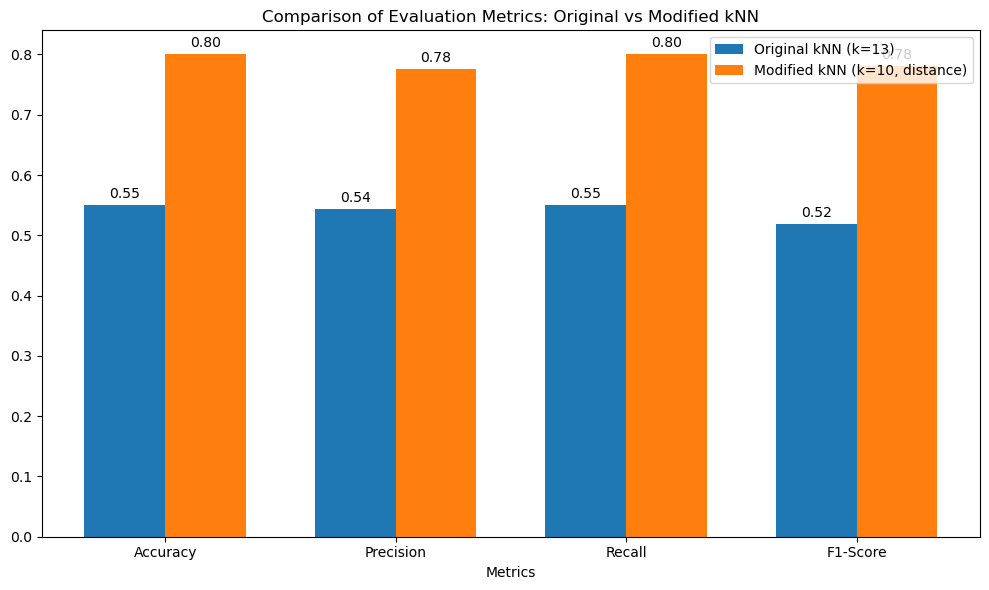

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 1: Drop rows with missing values
cleaned_data = data.dropna()

# Step 2: Random sampling of 500 instances
sample_data = cleaned_data.sample(n=500, random_state=42)

# For original kNN - No binning or encoding
X_original = sample_data.drop(columns=['quality'])
y_original = sample_data['quality']

# Convert data to numeric if necessary
X_original = X_original.apply(pd.to_numeric, errors='coerce')
X_original = X_original.dropna()

# Align target variable with the cleaned data
y_original = y_original[X_original.index]

# Split the data into training and test sets (80% train, 20% test)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Train original kNN model with k=13
best_k = 13
knn_original = KNeighborsClassifier(n_neighbors=best_k)
knn_original.fit(X_train_original_scaled, y_train_original)

# Predict using the original kNN
y_pred_original = knn_original.predict(X_test_original_scaled)

# Evaluate original kNN
accuracy_original = accuracy_score(y_test_original, y_pred_original)
class_report_original = classification_report(y_test_original, y_pred_original, zero_division=0, output_dict=True)
precision_original = class_report_original['weighted avg']['precision']
recall_original = class_report_original['weighted avg']['recall']
f1_original = class_report_original['weighted avg']['f1-score']

# Modified kNN - Binning and Encoding
# Convert 'quality' into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Label encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Select features (X) and target (y)
X_modified = sample_data.drop('quality', axis=1)  # Features
X_modified = X_modified.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X_modified = X_modified.dropna()  # Drop rows with NaN values

# Align target variable with the cleaned data
y_modified = sample_data['quality'].loc[X_modified.index]

# Split the data into training and test sets (80% train, 20% test)
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(
    X_modified, y_modified, test_size=0.2, random_state=42
)

# Standardize the data
X_train_modified_scaled = scaler.fit_transform(X_train_modified)
X_test_modified_scaled = scaler.transform(X_test_modified)

# Train modified kNN model with k=10, metric='euclidean', weights='distance'
knn_modified = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')
knn_modified.fit(X_train_modified_scaled, y_train_modified)

# Predict using the modified kNN
y_pred_modified = knn_modified.predict(X_test_modified_scaled)

# Evaluate modified kNN
accuracy_modified = accuracy_score(y_test_modified, y_pred_modified)
class_report_modified = classification_report(y_test_modified, y_pred_modified, zero_division=0, output_dict=True)
precision_modified = class_report_modified['weighted avg']['precision']
recall_modified = class_report_modified['weighted avg']['recall']
f1_modified = class_report_modified['weighted avg']['f1-score']

# Print the evaluation results for both models
print(f"Original kNN Accuracy (k={best_k}): {accuracy_original:.4f}")
print(f"Modified kNN Accuracy: {accuracy_modified:.4f}")

# Step 3: Compare the metrics using a bar plot

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
original_knn_scores = [accuracy_original, precision_original, recall_original, f1_original]
modified_knn_scores = [accuracy_modified, precision_modified, recall_modified, f1_modified]

# Plotting the comparison
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_knn_scores, width, label='Original kNN (k=13)')
rects2 = ax.bar(x + width/2, modified_knn_scores, width, label='Modified kNN (k=10, distance)')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Evaluation Metrics: Original vs Modified kNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add metric values on top of the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


DECISION TREE CLASSIFIER

In [576]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Data Cleaning - Drop rows with missing values
cleaned_data = data.dropna()

# Step 3: Random Sampling of 500 instances (sample both features and target together)
sample_data = cleaned_data.sample(n=500, random_state=42)

# Step 4: Convert 'quality' column into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Step 5: Label Encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Step 6: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Make sure to also drop corresponding rows from 'y' to maintain consistency
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train a basic Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Step 6: Predict the test set results
y_pred_dt = decision_tree.predict(X_test_scaled)

# Step 7: Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)

# Output the evaluation results for the Decision Tree
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.6900
Decision Tree Confusion Matrix:
 [[61 18]
 [13  8]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80        79
           1       0.31      0.38      0.34        21

    accuracy                           0.69       100
   macro avg       0.57      0.58      0.57       100
weighted avg       0.72      0.69      0.70       100



In [577]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 1: Data Cleaning - Drop rows with missing values
cleaned_data = data.dropna()

# Step 2: Random Sampling of 500 instances (sample both features and target together)
sample_data = cleaned_data.sample(n=500, random_state=42)

# Step 3: Convert 'quality' column into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Step 4: Label Encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Step 5: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Step 6: Align target variable (y) with the cleaned feature set (X)
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params)

# Get the best estimator (model) with those parameters
best_decision_tree = grid_search.best_estimator_

# Use the best model to predict
y_pred_best_dt = best_decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Best Decision Tree Accuracy: {accuracy_best_dt:.4f}")


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Decision Tree Accuracy: 0.7200


In [578]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 1: Data Cleaning - Drop rows with missing values
cleaned_data = data.dropna()

# Step 2: Random Sampling of 500 instances (sample both features and target together)
sample_data = cleaned_data.sample(n=500, random_state=42)

# Step 3: Convert 'quality' column into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Step 4: Label Encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Step 5: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Step 6: Align target variable (y) with the cleaned feature set (X)
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best parameters found from GridSearchCV
best_params = {
    'criterion': 'gini',  # Example: Replace with your best-found criterion
    'max_depth': 10,      # Example: Replace with your best-found max_depth
    'min_samples_split': 10,  # Example: Replace with your best-found min_samples_split
    'min_samples_leaf': 5     # Example: Replace with your best-found min_samples_leaf
}

# Step 9: Train a Decision Tree Classifier with the best parameters
decision_tree = DecisionTreeClassifier(
    criterion=best_params['criterion'], 
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model
decision_tree.fit(X_train_scaled, y_train)

# Step 10: Predict the test set results
y_pred_dt = decision_tree.predict(X_test_scaled)

# Step 11: Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)

# Output the evaluation results for the Decision Tree
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.7100
Decision Tree Confusion Matrix:
 [[63 16]
 [13  8]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        79
           1       0.33      0.38      0.36        21

    accuracy                           0.71       100
   macro avg       0.58      0.59      0.58       100
weighted avg       0.72      0.71      0.72       100



KEY METRICS AND COMPARISON OF KNN AND DECISION TREE CLASSIFIER

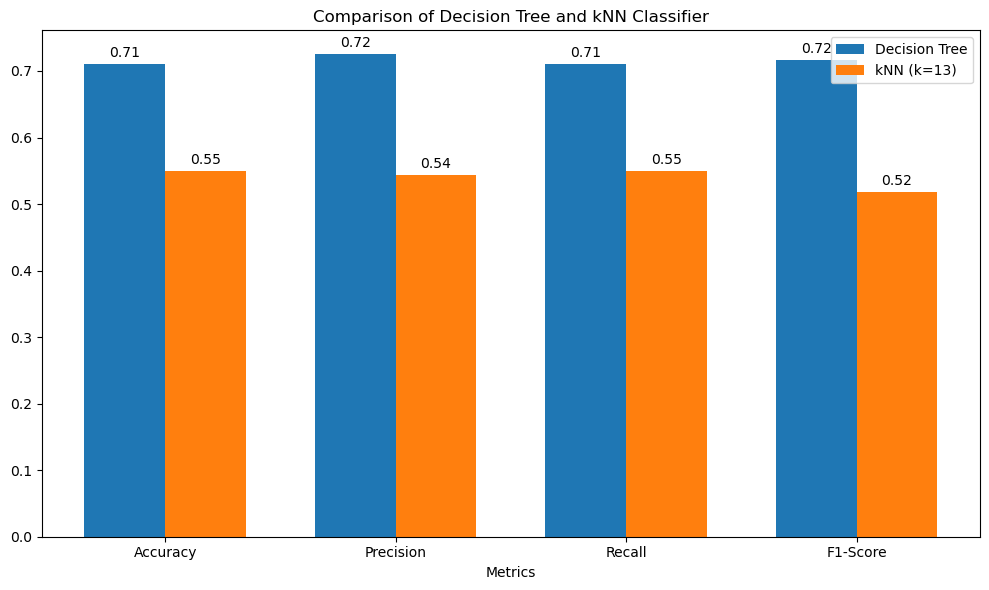

In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Provide the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Data Cleaning - Drop rows with missing values
cleaned_data = data.dropna()

# Step 3: Random Sampling of 500 instances (sample both features and target together)
sample_data = cleaned_data.sample(n=500, random_state=42)


# Step 6: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Align target variable with cleaned features
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data (important for distance-based algorithms like kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### kNN Classifier ###
best_k = 13
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, zero_division=0, output_dict=True)

### Decision Tree Classifier ###
# Step 3: Convert 'quality' column into two classes ('bad' and 'good')
bins = (2, 6.5, 8)  # Define the bin edges for quality scores
group_names = ['bad', 'good']  # Define group names for binning
sample_data['quality'] = pd.cut(sample_data['quality'], bins=bins, labels=group_names)

# Step 4: Label Encoding for 'quality'
label_quality = LabelEncoder()
sample_data['quality'] = label_quality.fit_transform(sample_data['quality'])  # 'bad' -> 0, 'good' -> 1

# Step 5: Ensure all features are numeric
X = sample_data.drop('quality', axis=1)  # Features
X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN
X = X.dropna()  # Drop rows with NaN values

# Step 6: Align target variable (y) with the cleaned feature set (X)
y = sample_data['quality'].loc[X.index]

# Step 7: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best parameters found from GridSearchCV
best_params = {
    'criterion': 'gini',  # Example: Replace with your best-found criterion
    'max_depth': 10,      # Example: Replace with your best-found max_depth
    'min_samples_split': 10,  # Example: Replace with your best-found min_samples_split
    'min_samples_leaf': 5     # Example: Replace with your best-found min_samples_leaf
}

# Step 9: Train a Decision Tree Classifier with the best parameters
decision_tree = DecisionTreeClassifier(
    criterion=best_params['criterion'], 
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model
decision_tree.fit(X_train_scaled, y_train)

# Step 10: Predict the test set results
y_pred_dt = decision_tree.predict(X_test_scaled)

# Step 11: Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)


decision_tree = DecisionTreeClassifier(
    criterion=best_params['criterion'], 
    max_depth=best_params['max_depth'], 
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0, output_dict=True)

### Extract Key Metrics for Comparison ###
# Decision Tree metrics
precision_dt = class_report_dt['weighted avg']['precision']
recall_dt = class_report_dt['weighted avg']['recall']
f1_dt = class_report_dt['weighted avg']['f1-score']

# kNN metrics
precision_knn = class_report_knn['weighted avg']['precision']
recall_knn = class_report_knn['weighted avg']['recall']
f1_knn = class_report_knn['weighted avg']['f1-score']

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
decision_tree_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Plotting the comparison
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, decision_tree_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, knn_scores, width, label=f'kNN (k={best_k})')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Decision Tree and kNN Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add metric values on top of the bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


CLUSTERING

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Means Metrics:
Silhouette Score: 0.1391
Davies-Bouldin Index: 2.0718
Calinski-Harabasz Score: 60.5893


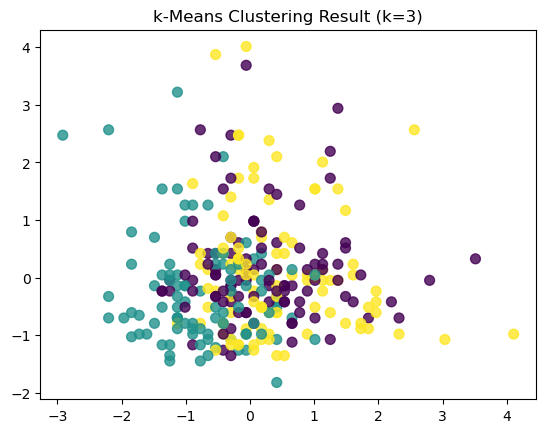

In [582]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Take a random sample of 300 instances and drop rows with missing values
sample_data = data.dropna().sample(n=300, random_state=42)

# Step 3: Write the random sample to a new CSV file
output_file_path = 's4062761r-A2SampleThree.csv'
sample_data.to_csv(output_file_path, index=False)

# Step 4: Data Preprocessing - Ensure that all columns are numeric, and drop non-numeric columns if necessary
data_cleaned = sample_data.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric data to NaN
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values

# Step 5: Drop the 'quality' column for clustering (since we are clustering without it)
if 'quality' in data_cleaned.columns:
    X = data_cleaned.drop(columns=['quality'])  # Use all other columns as input variables
else:
    X = data_cleaned  # If 'quality' doesn't exist, use the data as it is

# Step 6: Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Implement K-Means with k=3 (for example) and evaluate its performance
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 8: Evaluate K-Means clustering performance
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

# Output K-Means evaluation results
print("k-Means Metrics:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans:.4f}")

# Step 9: Plot the clustering result
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('k-Means Clustering Result (k=3)')
plt.show()


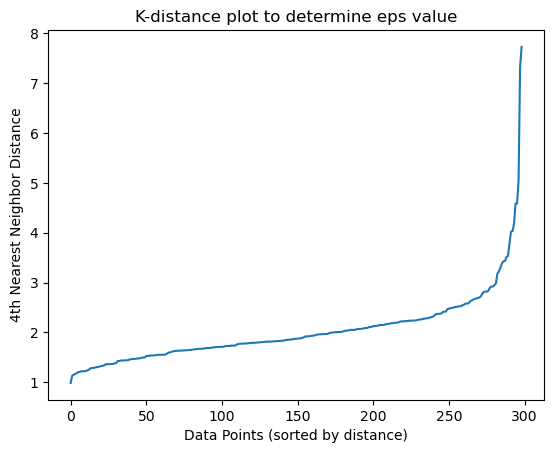

DBSCAN Metrics:
Silhouette Score: 0.1331
Davies-Bouldin Index: 5.2324
Calinski-Harabasz Score: 9.1834


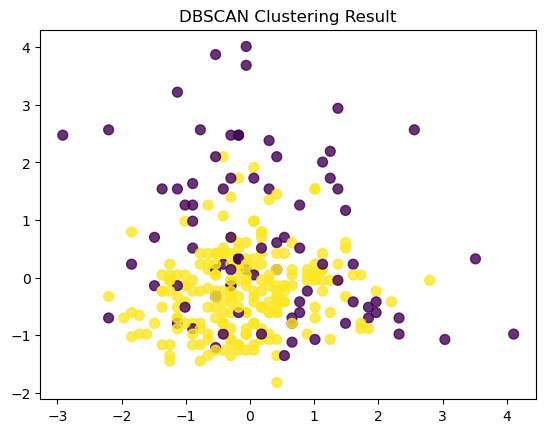

In [583]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Take a random sample of 300 instances and drop rows with missing values
sample_data = data.dropna().sample(n=300, random_state=42)

# Step 3: Write the random sample to a new CSV file
output_file_path = 's4062761r-A2SampleThree.csv'
sample_data.to_csv(output_file_path, index=False)

# Step 2: Data Preprocessing - Ensure that all columns are numeric, and drop non-numeric columns if necessary
data_cleaned = sample_data.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric data to NaN
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values

# Step 3: Drop the 'quality' column for clustering (since we are clustering without it)
if 'quality' in data_cleaned.columns:
    X = data_cleaned.drop(columns=['quality'])  # Use all other columns as input variables
else:
    X = data_cleaned  # If 'quality' doesn't exist, use the data as it is

# Step 4: Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Use k-distance plot to determine an appropriate epsilon value (eps)
nbrs = NearestNeighbors(n_neighbors=4).fit(X_scaled)  # k-distance with k=4
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = distances[:, 3]  # Take the distance to the 4th nearest neighbor
k_distances = sorted(k_distances)

# Plot the k-distance graph to visually determine eps
plt.plot(k_distances)
plt.ylabel('4th Nearest Neighbor Distance')
plt.xlabel('Data Points (sorted by distance)')
plt.title('K-distance plot to determine eps value')
plt.show()

# Step 6: Implement DBSCAN with appropriate eps and min_samples values
eps_value = 2.0 # Adjust this based on your k-distance plot
min_samples_value = 5  # Commonly used default value

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 7: Evaluate the DBSCAN clustering performance
if len(set(dbscan_labels)) > 1:  # To avoid metrics failure when there's only 1 cluster
    silhouette = silhouette_score(X_scaled, dbscan_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, dbscan_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, dbscan_labels)
else:
    silhouette = 0.0
    davies_bouldin = 0.0
    calinski_harabasz = 0.0

# Output DBSCAN evaluation results
print("DBSCAN Metrics:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

# Step 8: Plot the DBSCAN clustering result
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN Clustering Result')
plt.show()


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Means Metrics:
Silhouette Score: 0.1391
Davies-Bouldin Index: 2.0718
Calinski-Harabasz Score: 60.5893

DBSCAN Metrics:
Silhouette Score: 0.1331
Davies-Bouldin Index: 5.2324
Calinski-Harabasz Score: 9.1834


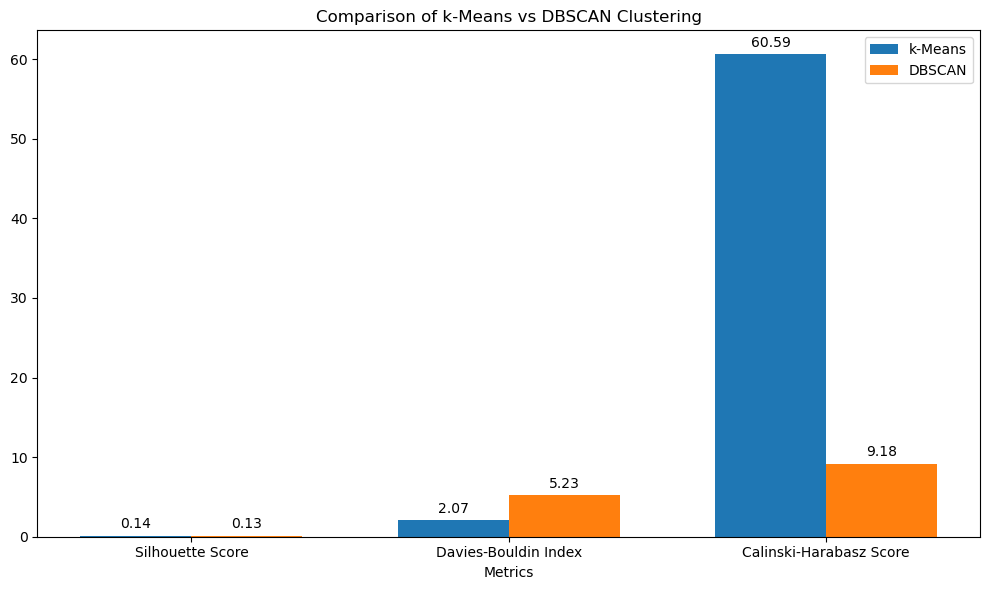

In [584]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Step 1: Load the CSV data
file_path = 'D:/Prac-DS/A2data.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path, delimiter=';')

# Step 2: Take a random sample of 300 instances and drop rows with missing values
sample_data = data.dropna().sample(n=300, random_state=42)

# Step 3: Write the random sample to a new CSV file
output_file_path = 's4062761r-A2SampleThree.csv'
sample_data.to_csv(output_file_path, index=False)

# Step 2: Data Preprocessing - Ensure that all columns are numeric, and drop non-numeric columns if necessary
data_cleaned = sample_data.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric data to NaN
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values

# Step 3: Drop the 'quality' column for clustering (since we are clustering without it)
if 'quality' in data_cleaned.columns:
    X = data_cleaned.drop(columns=['quality'])  # Use all other columns as input variables
else:
    X = data_cleaned  # If 'quality' doesn't exist, use the data as it is

# Step 4: Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Implement k-Means with k=3 (for example) and evaluate its performance
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

# Output k-Means evaluation results
print("k-Means Metrics:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans:.4f}")

# Step 6: Implement DBSCAN with appropriate eps and min_samples values and evaluate its performance
eps_value = 2.0  # Based on the k-distance plot you provided
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 7: Evaluate DBSCAN clustering performance
if len(set(dbscan_labels)) > 1:  # To avoid metrics failure when there's only 1 cluster
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)
else:
    silhouette_dbscan = 0.0
    davies_bouldin_dbscan = 0.0
    calinski_harabasz_dbscan = 0.0

# Output DBSCAN evaluation results
print("\nDBSCAN Metrics:")
print(f"Silhouette Score: {silhouette_dbscan:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_dbscan:.4f}")

# Step 8: Plot comparison of k-Means and DBSCAN
metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score']
kmeans_scores = [silhouette_kmeans, davies_bouldin_kmeans, calinski_harabasz_kmeans]
dbscan_scores = [silhouette_dbscan, davies_bouldin_dbscan, calinski_harabasz_dbscan]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, kmeans_scores, width, label='k-Means')
rects2 = ax.bar(x + width/2, dbscan_scores, width, label='DBSCAN')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Comparison of k-Means vs DBSCAN Clustering')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate the bars with values
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
